# Data Understanding

## Imports

In [1]:
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 10,10
pd.options.display.max_columns = None


In [2]:
sitesDb = pd.read_csv("../Data/BI_mst_lq_Q.csv") # Sites
mainDb = pd.read_csv("../Data/mi_lqk_dq.csv") # 5 Million
chemDb = pd.read_csv("../Data/rx_param_4_lq_q.csv") # Chemicals

## Data cleaning.

### Joined location name and chemical name to mainDb and saved it as mainDbAll

In [3]:
mainDb['locationName'] = mainDb['idobj']
sitesDb['locationName'] = sitesDb['idsatz']
sitesDbCopy = sitesDb[['locationName','objnam']]
mainDbLocation = mainDb.merge(sitesDbCopy, on="locationName", how="left")
mainDbLocation['chemName'] = mainDbLocation['param']
chemDb['chemName'] = chemDb['idsatz']
chemDbCopy = chemDb[['chemName','objnam']]
mainDbAll = mainDbLocation.merge(chemDbCopy, on="chemName", how="left")
mainDbAll.drop(['locationName','chemName'], axis=1, inplace=True)
mainDbAll.rename(columns={'objnam_x':'locationName','objnam_y':'chemName'}, inplace=True)

### mainDbAll sort by date  

In [4]:
mainDbAll.sort_values(by=['dtbeg'], inplace=True)

## Data Visualizing

### Correlation Matrix of all columns

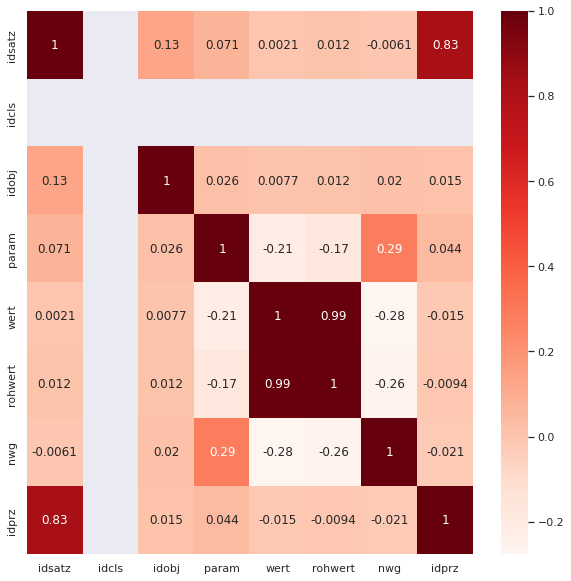

In [6]:
cor = mainDbAll.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

> No correlation between the parameters

### Splitting the data into 6 different dataframes as per the chemical name

In [6]:
sDbChem1 = mainDbAll[mainDbAll['chemName'] == 'Stickstoffmonoxid']
sDbChem2 = mainDbAll[mainDbAll['chemName'] == 'Stickstoffdioxid']
sDbChem3 = mainDbAll[mainDbAll['chemName'] == 'Schwefeldioxid']
sDbChem4 = mainDbAll[mainDbAll['chemName'] == 'PM2.5']
sDbChem5 = mainDbAll[mainDbAll['chemName'] == 'PM10']
sDbChem6 = mainDbAll[mainDbAll['chemName'] == 'Ozon']
verification = mainDbAll.shape[0] == sDbChem1.shape[0] + sDbChem2.shape[0] + sDbChem3.shape[0] + sDbChem4.shape[0] + sDbChem5.shape[0] + sDbChem6.shape[0]
print(f"If splitting of the data is done accurately: {verification}")

If splitting of the data is done accurately: True


### Creating average values for each location

In [10]:
sDbChem1Avg = sDbChem1.groupby(['locationName']).mean()
sDbChem1Avg = sDbChem1Avg.reset_index()
sDbChem2Avg = sDbChem2.groupby(['locationName']).mean()
sDbChem2Avg = sDbChem2Avg.reset_index()
sDbChem3Avg = sDbChem3.groupby(['locationName']).mean()
sDbChem3Avg = sDbChem3Avg.reset_index()
sDbChem4Avg = sDbChem4.groupby(['locationName']).mean()
sDbChem4Avg = sDbChem4Avg.reset_index()
sDbChem5Avg = sDbChem5.groupby(['locationName']).mean()
sDbChem5Avg = sDbChem5Avg.reset_index()
sDbChem6Avg = sDbChem6.groupby(['locationName']).mean()
sDbChem6Avg = sDbChem6Avg.reset_index()

### Plotting bar graph the data for each chemical in a single 

In [15]:
# Plotting the data and color coding the maximum value in red and minimum in green
fig1 = ex.bar(
    sDbChem1Avg,
    x='locationName',
    y='wert',
    title='Stickstoffmonoxid [nitric oxide]',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem1Avg['wert'] == sDbChem1Avg['wert'].max(),
)
fig2 = ex.bar(
    sDbChem2Avg,
    x='locationName',
    y='wert',
    title='Stickstoffdioxid [nitrogen dioxide]',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem2Avg['wert'] == sDbChem2Avg['wert'].max()
    )
fig3 = ex.bar(
    sDbChem3Avg,
    x='locationName',
    y='wert',
    title='Schwefeldioxid [sulfur dioxide]',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem3Avg['wert'] == sDbChem3Avg['wert'].max()
    )
fig4 = ex.bar(
    sDbChem4Avg,
    x='locationName',
    y='wert',
    title='PM2.5',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem4Avg['wert'] == sDbChem4Avg['wert'].max()
    )
fig5 = ex.bar(
    sDbChem5Avg,
    x='locationName',
    y='wert',
    title='PM10',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem5Avg['wert'] == sDbChem5Avg['wert'].max()
    )
fig6 = ex.bar(
    sDbChem6Avg,
    x='locationName',
    y='wert',
    title='Ozon',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem6Avg['wert'] == sDbChem6Avg['wert'].max()
    )
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

## Facts about data

In [21]:
print(f"The number of cities with Stickstoffmonoxid [nitric oxide]  data available is: {sDbChem1Avg.locationName.unique().shape[0]}")
print(f"The number of cities with Stickstoffdioxid [nitrogen dioxide] data available is: {sDbChem2Avg.locationName.unique().shape[0]}")
print(f"The number of cities with Schwefeldioxid [sulfur dioxide] data available is: {sDbChem3Avg.locationName.unique().shape[0]}")
print(f"The number of cities with PM2.5 data available is: {sDbChem4Avg.locationName.unique().shape[0]}")
print(f"The number of cities with PM10 data available is: {sDbChem5Avg.locationName.unique().shape[0]}")
print(f"The number of cities with Ozon data available is: {sDbChem6Avg.locationName.unique().shape[0]}")

The number of cities with Stickstoffmonoxid [nitric oxide]  data available is: 61
The number of cities with Stickstoffdioxid [nitrogen dioxide] data available is: 61
The number of cities with Schwefeldioxid [sulfur dioxide] data available is: 7
The number of cities with PM2.5 data available is: 46
The number of cities with PM10 data available is: 59
The number of cities with Ozon data available is: 29


In [50]:
startRow = mainDbLocation.head(1)
endRow = mainDbLocation.tail(1)
startDate = startRow['dtbeg'].values[0]
endDate = endRow['dtend'].values[0]
print(f"The data is available from {startDate} to {endDate}")


The data is available from 2019-12-31 to 2022-10-01
